### Import Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [14]:

np.random.seed(42)
years_exp = np.random.uniform(1, 10, 30)
salary = 25000 + (years_exp * 9000) + np.random.normal(0, 5000, 30)

df = pd.DataFrame({
    'YearsExperience': years_exp,
    'Salary': salary
})


df.to_csv('Salary_Data.csv', index=False)

In [15]:
df.head()

,YearsExperience,Salary
0,4.370861,58582.781740
1,9.556429,112886.348911
2,7.587945,90288.315837
3,6.387926,81032.868471
4,2.404168,43628.976815


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [17]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,4.947375,68616.232245
std,2.541668,21319.289386
min,1.185260,36711.662013
25%,2.687246,52242.869419
50%,4.629183,60488.372269
75%,6.482516,86414.695522
max,9.729189,112886.348911


In [18]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

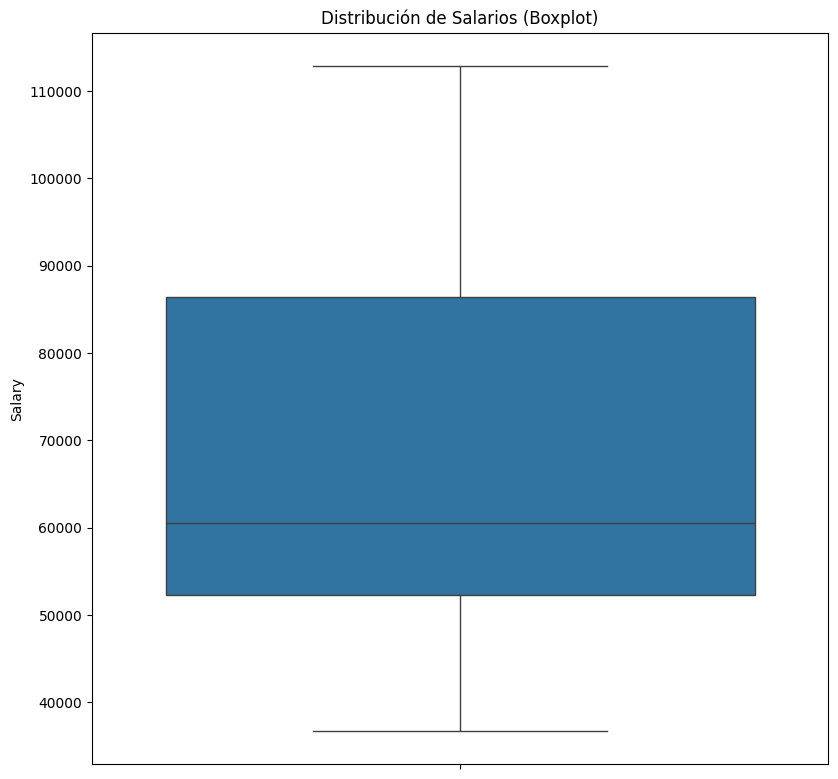

In [19]:
plt.figure(figsize=(9.5, 9.5))
sns.boxplot(y=df['Salary'])
plt.title('Distribución de Salarios (Boxplot)')
plt.show()

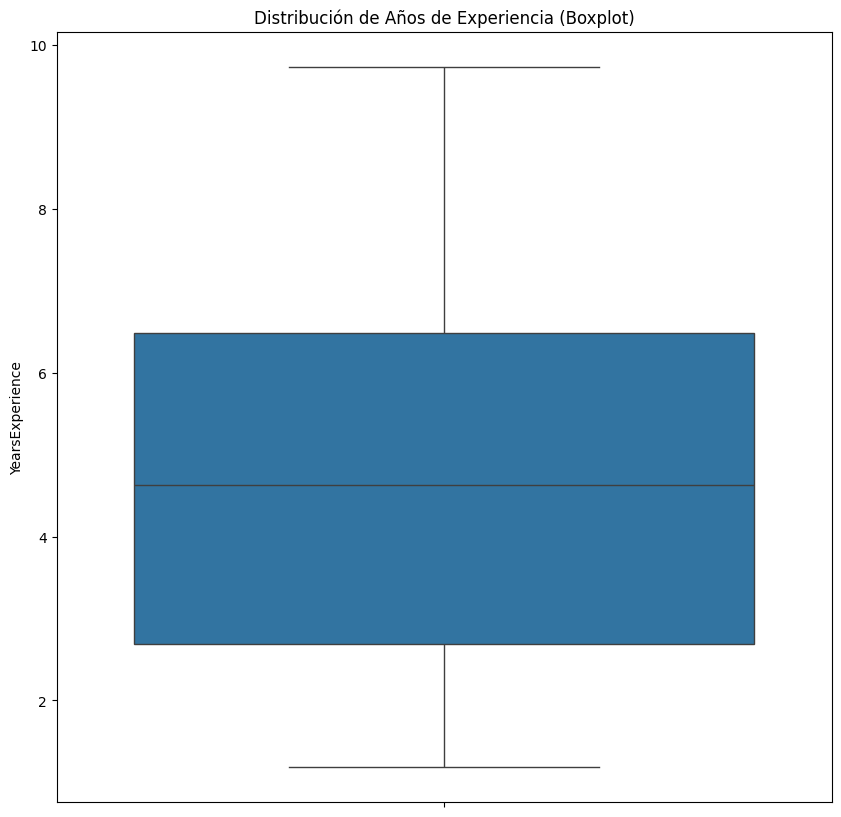

In [20]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['YearsExperience'])
plt.title('Distribución de Años de Experiencia (Boxplot)')
plt.show()


Matriz de correlación:
                 YearsExperience    Salary
YearsExperience         1.000000  0.980705
Salary                  0.980705  1.000000


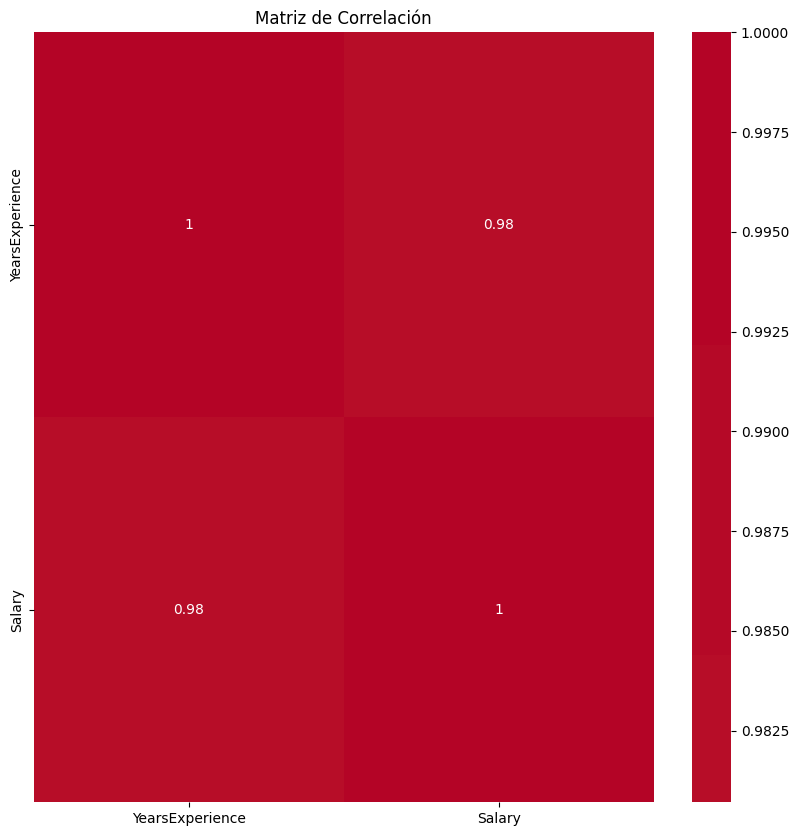

In [29]:
corr_matrix = df.corr()
print("\nMatriz de correlación:")
print(corr_matrix)


plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

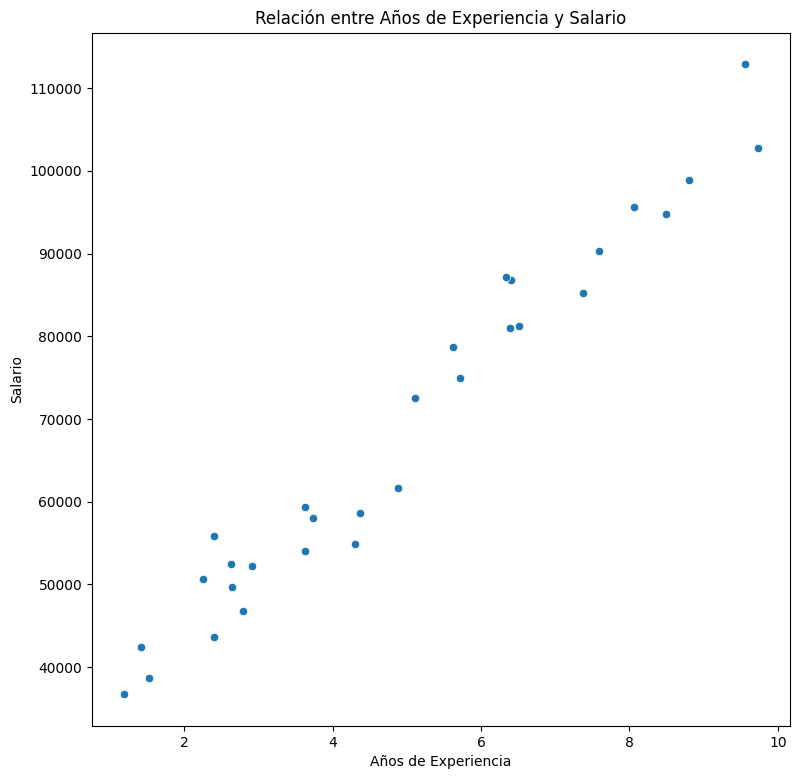

In [30]:

plt.figure(figsize=(9, 9))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Relación entre Años de Experiencia y Salario')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.show()

In [31]:

X = df[['YearsExperience']]  


y = df['Salary']

In [7]:

X = df[['YearsExperience']]  

y = df['Salary']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

[
    "Forma de los conjuntos:",
    f"X_train: {X_train.shape}",
    f"X_test: {X_test.shape}",
    f"y_train: {y_train.shape}",
    f"y_test: {y_test.shape}"
]

['Forma de los conjuntos:',
 'X_train: (21, 1)',
 'X_test: (9, 1)',
 'y_train: (21,)',
 'y_test: (9,)']

In [35]:
X_train.head()


,YearsExperience
0,4.370861
4,2.404168
16,3.738180
5,2.403951
13,2.911052


In [36]:
y_train.head()

0     58582.781740
4     43628.976815
16    58065.380268
5     55896.947070
13    52183.774144
Name: Salary, dtype: float64

In [37]:

model = LinearRegression()

model.fit(X_train, y_train)

print("\nParámetros del modelo:")
print("Intercepto (β₀):", model.intercept_)
print("Coeficiente (β₁):", model.coef_)


Parámetros del modelo:
Intercepto (β₀): 27979.000699174067
Coeficiente (β₁): [8153.61769875]



Evaluación en datos de entrenamiento:
Error Cuadrático Medio (MSE): 14032966.697783686
Coeficiente de Determinación (R²): 0.972264259298704


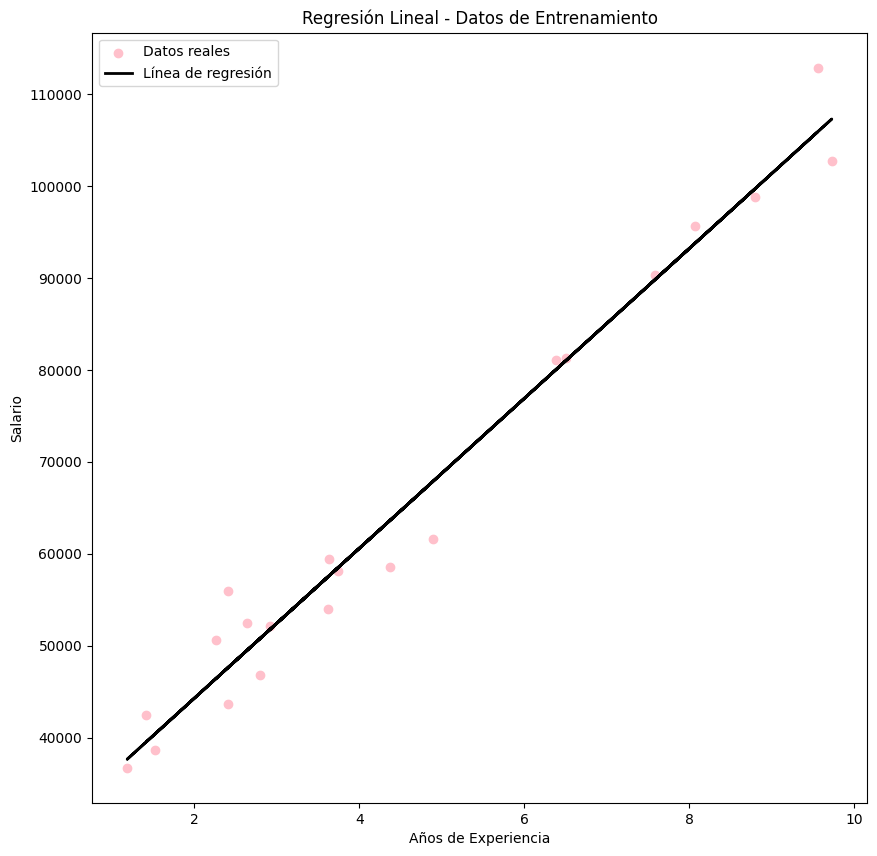

In [10]:

y_train_pred = model.predict(X_train)


mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("\nEvaluación en datos de entrenamiento:")
print("Error Cuadrático Medio (MSE):", mse_train)
print("Coeficiente de Determinación (R²):", r2_train)

plt.figure(figsize=(10, 10))
plt.scatter(X_train, y_train, color='pink', label='Datos reales')
plt.plot(X_train, y_train_pred, color='black', linewidth=2, label='Línea de regresión')
plt.title('Regresión Lineal - Datos de Entrenamiento')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.legend()
plt.show()


Evaluación en datos de prueba:
Error Cuadrático Medio (MSE): 23634115.724369314
Coeficiente de Determinación (R²): 0.8842310082385462


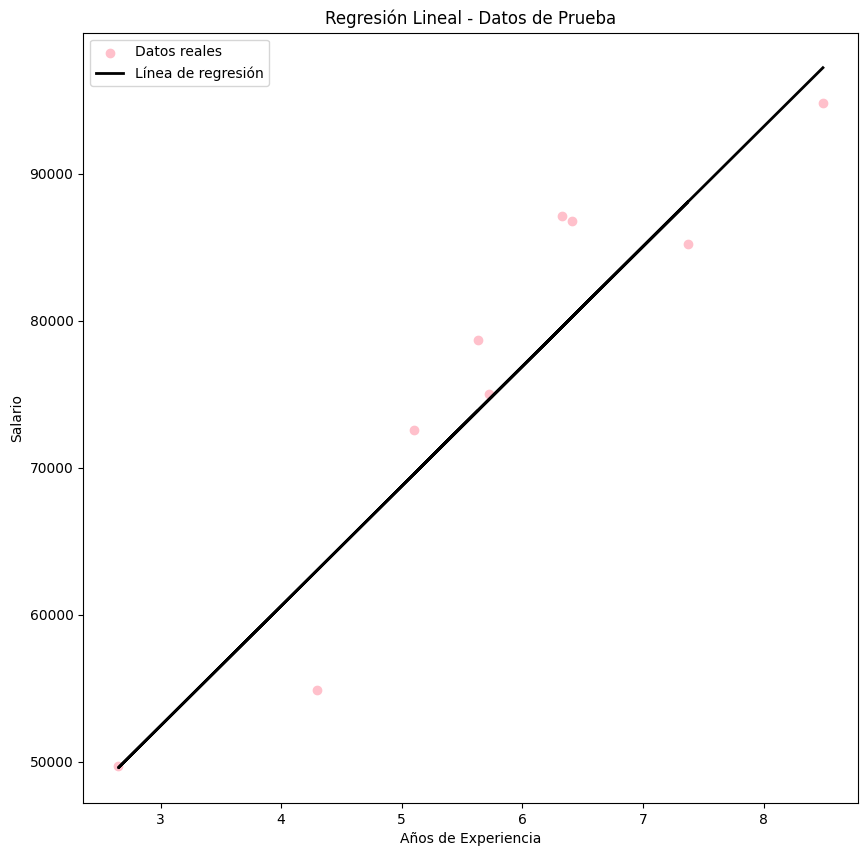

In [11]:

y_test_pred = model.predict(X_test)


mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nEvaluación en datos de prueba:")
print("Error Cuadrático Medio (MSE):", mse_test)
print("Coeficiente de Determinación (R²):", r2_test)

plt.figure(figsize=(10, 10))
plt.scatter(X_test, y_test, color='pink', label='Datos reales')
plt.plot(X_test, y_test_pred, color='black', linewidth=2, label='Línea de regresión')
plt.title('Regresión Lineal - Datos de Prueba')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.legend()
plt.show()

In [12]:
print("\nEcuación del modelo:")
print(f"Salario = {model.intercept_:.2f} + {model.coef_[0]:.2f} * AñosExperiencia")


Ecuación del modelo:
Salario = 27979.00 + 8153.62 * AñosExperiencia


In [13]:

nuevo_dato = pd.DataFrame({'YearsExperience': [5]})
salario_predicho = model.predict(nuevo_dato)

print(f"\nPara 5 años de experiencia, el salario predicho es: ${salario_predicho[0]:.2f}")


Para 5 años de experiencia, el salario predicho es: $68747.09
